In [1]:
import logging
logging.basicConfig(level=logging.INFO)

import sys
sys.path.insert(0, "D:/IIT/DDP/DDP/B-SOID/")
import random
import numpy as np
import seaborn as sns

from BSOID.bsoid import *
from BSOID.preprocessing import *
from BSOID.features import *

In [ ]:
raw_dir = "../../../data/videos/"
raw_files = [os.path.join(raw_dir, f) for f in os.listdir(raw_dir) if f.endswith(".h5")]

bodyparts = []

fdata = []
for f in raw_files:
    conf, pos = process_h5py_data(h5py.File(f, 'r'))
    bsoid_data = bsoid_format(conf, pos)
    data, perc_filt = likelihood_filter(bsoid_data, fps=30, bodyparts=np.arange(11))
    print(f'filtered {round(perc_filt, 2)}% of data')
    fdata.append(data)

# Embedding for Visualization

In [2]:
from numba import njit
@njit(fastmath=True)
def KL(x, y):
    n = x.shape[0]
    x_sum = 0.0
    y_sum = 0.0
    kl = 0.0
    z = 1e-11

    for i in range(n):
        x_sum += (x[i] + z)
        y_sum += (y[i] + z)

    for i in range(n):
        kl += ((x[i] + z) / x_sum) * np.log(((x[i] + z) / x_sum) / ((y[i] + z) / y_sum))

    return kl

In [118]:
bsoid = BSOID("../config/config.yaml")
fdata = bsoid.load_filtered_data()
feats = extract_all_feats(fdata[random.sample(strains, 1)[0]])
del fdata

    Run ID       : dis
 Save Location   : D:/IIT/DDP/data\dis/output
      FPS        : 30
 Min. Confidence : 0.3
  Stride Window  : 333ms



In [3]:
with open("../../../data/2clustering/strainwise_labels.sav", "rb") as f:
    feats, embeddings, labels = joblib.load(f)

In [74]:
from behavelet import wavelet_transform
_, _, wav = wavelet_transform(feats, n_freqs=25, fsample=30., fmin=1., fmax=15., n_jobs=-1)

In [11]:
strains = list(feats.keys())
def plot(x, **kwargs):
    plt.figure(figsize=(6,6))
    plt.scatter(x[:,0], x[:,1], **kwargs)
    plt.show()

In [125]:
from sklearn.preprocessing import MinMaxScaler
# comb_feats = np.hstack((feats, PCA(n_components=56).fit_transform(wav)))
comb_feats = StandardScaler().fit_transform(feats)
mapper = umap.UMAP(n_components=2, n_neighbors=90, min_dist=0.0, verbose=True, metric="euclidean").fit(comb_feats)
embed = MinMaxScaler().fit_transform(mapper.embedding_)

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.0, n_neighbors=90, verbose=True)
Construct fuzzy simplicial set
Sat May  8 08:14:51 2021 Finding Nearest Neighbors
Sat May  8 08:14:51 2021 Building RP forest with 17 trees
Sat May  8 08:14:51 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Sat May  8 08:15:38 2021 Finished Nearest Neighbor Search
Sat May  8 08:15:39 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat May  8 08:16:25 2021 Finished embedding


<IPython.core.display.Javascript object>


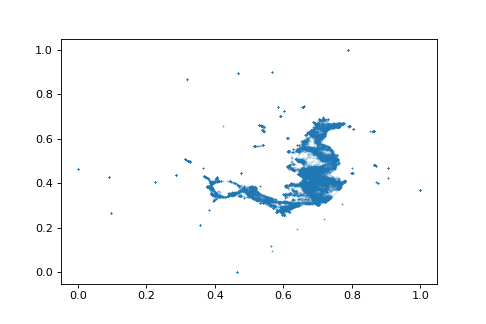

In [126]:
plot(embed, alpha=0.2, s=0.1)

In [127]:
embedding = umap.UMAP(n_components=25, n_neighbors=90, min_dist=0.0, verbose=True).fit_transform(comb_feats)
labs, _, soft_labs, _ = cluster_with_hdbscan(embedding, [0.4, 1.2, 12], bsoid.hdbscan_params)

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.0, n_components=25,
     n_neighbors=90, verbose=True)
Construct fuzzy simplicial set
Sat May  8 08:16:54 2021 Finding Nearest Neighbors
Sat May  8 08:16:54 2021 Building RP forest with 17 trees
Sat May  8 08:16:54 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Sat May  8 08:17:40 2021 Finished Nearest Neighbor Search
Sat May  8 08:17:41 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat May  8 08:18:35 2021 Finished embedding


INFO:root:identified 45 clusters (max is 45) with min_sample_prop=0.4 and entropy_ratio=0.919
INFO:root:identified 34 clusters (max is 45) with min_sample_prop=0.47 and entropy_ratio=0.8
INFO:root:identified 24 clusters (max is 45) with min_sample_prop=0.55 and entropy_ratio=0.799
INFO:root:identified 8 clusters (max is 45) with min_sample_prop=0.62 and entropy_ratio=0.52
INFO:root:identified 8 clusters (max is 45) with min_sample_prop=0.69 and entropy_ratio=0.52
INFO:root:identified 8 clusters (max is 45) with min_sample_prop=0.76 and entropy_ratio=0.52
INFO:root:identified 7 clusters (max is 45) with min_sample_prop=0.84 and entropy_ratio=0.533
INFO:root:identified 7 clusters (max is 45) with min_sample_prop=0.91 and entropy_ratio=0.533
INFO:root:identified 7 clusters (max is 45) with min_sample_prop=0.98 and entropy_ratio=0.533
INFO:root:identified 2 clusters (max is 45) with min_sample_prop=1.05 and entropy_ratio=0.232
INFO:root:identified 2 clusters (max is 45) with min_sample_pro

<IPython.core.display.Javascript object>


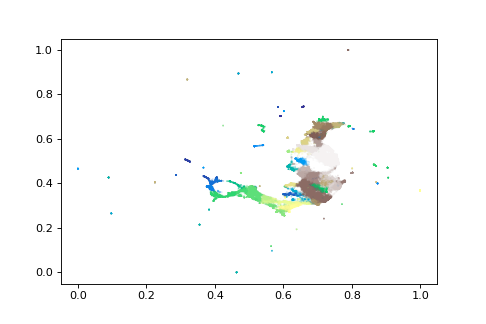

In [128]:
plot(embed, alpha=0.2, s=0.2, c=soft_labs, cmap="terrain")

In [22]:
curr_strain = random.sample(strains, 1)[0]
strain_feats = np.vstack(feats[curr_strain])
strain_labs, strain_soft_labs = labels[curr_strain]

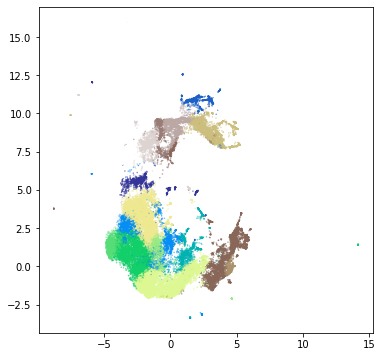

In [26]:
# embed = umap.UMAP(n_neighbors=90, n_components=2, min_dist=0.0, verbose=True, metric="euclidean").fit_transform(StandardScaler().fit_transform(strain_feats))
plot(embed, s=0.2, alpha=0.7, c=strain_soft_labs, cmap="terrain")